In [1]:
import numpy as np
import matplotlib.pyplot as pl


## FF=0

In [2]:
data = np.loadtxt('./results/BF_scaling_220+221_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]

In [3]:
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.50005 +- 0.00008


In [4]:
idx = log_BF>0
np.polyfit(SNRtot_MF[idx], np.sqrt(log_BF)[idx], deg=1, cov = True)

(array([ 0.70775009, -0.13122744]),
 array([[ 7.38532862e-09, -7.20329870e-07],
        [-7.20329870e-07,  9.54678474e-05]]))

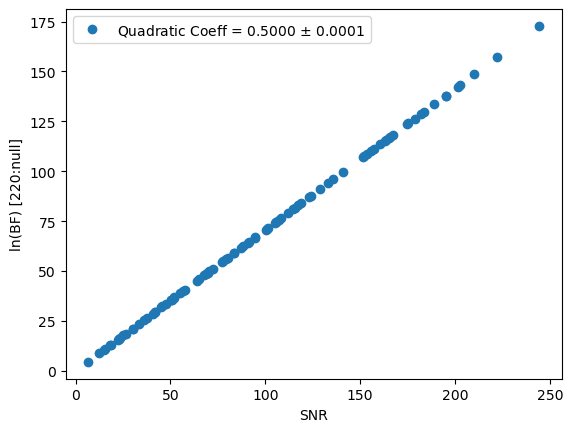

In [5]:
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:null]")
pl.legend()

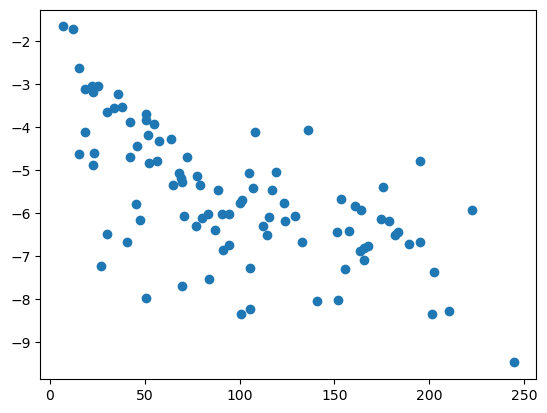

In [6]:
# SNR ~ \propto - log(occams)
pl.plot(SNRtot_MF, np.log(occams), 'o')

Text(0, 0.5, 'PDF')

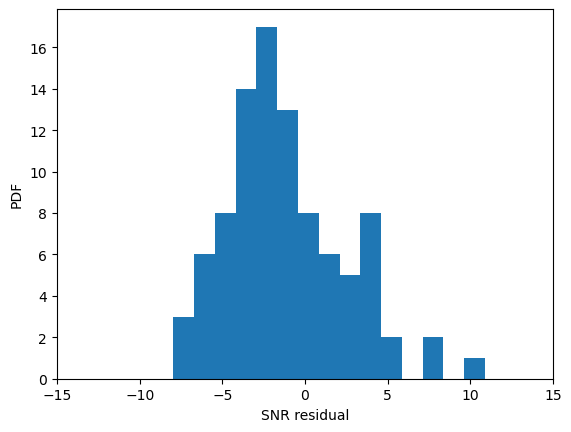

In [7]:
residual = 2*(log_BF-np.log(occams)) - SNRtot_MF**2
pl.hist(residual, bins=30);
pl.xlim(-15, 15)
pl.xlabel("SNR residual")
pl.ylabel("PDF")

In [8]:
median = np.median(residual)
neg_err = median - np.quantile(residual, 0.025)
pos_err = np.quantile(residual, 0.975) - median

print(r"SNR residual = %.2f (+ %.2f) (- %.2f). 0.95 error region" % \
      (median, pos_err, neg_err))

SNR residual = -1.94 (+ 8.30) (- 5.16). 0.95 error region


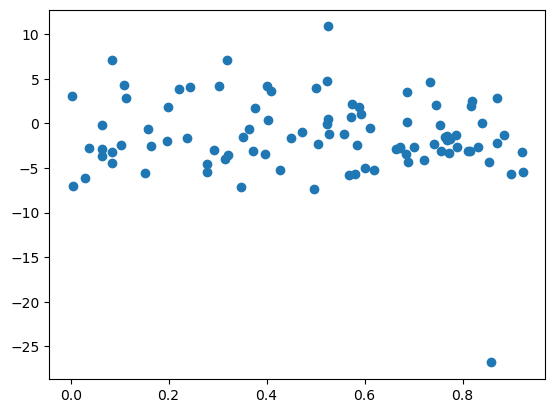

In [9]:
pl.plot(chi_inject, residual, 'o')

## FF != 0

Quadratic coefficient = 0.00165 +- 0.00027


/tmp/ipykernel_224103/2402672536.py:10: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))


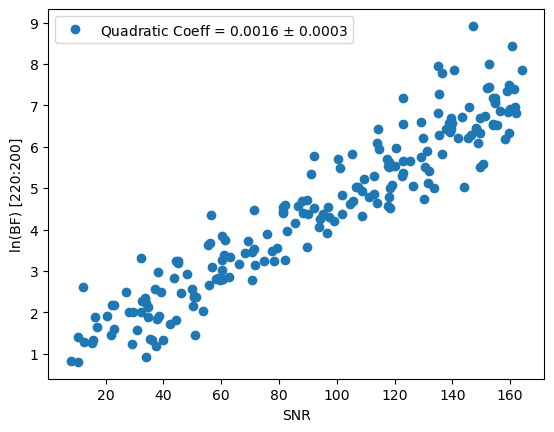

In [10]:
#no flow
data = np.loadtxt('./results/BF_scaling_allFixed220:200_ALL_OLD.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

In [11]:
np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)

(array([0.00164699, 0.05701245, 0.73619926]),
 array([[ 7.27960053e-08, -1.30116818e-05,  4.29716645e-04],
        [-1.30116818e-05,  2.43410743e-03, -8.68436655e-02],
        [ 4.29716645e-04, -8.68436655e-02,  3.69061544e+00]]))

Quadratic coefficient = 0.00146 +- 0.00023


/tmp/ipykernel_224103/399758584.py:10: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))


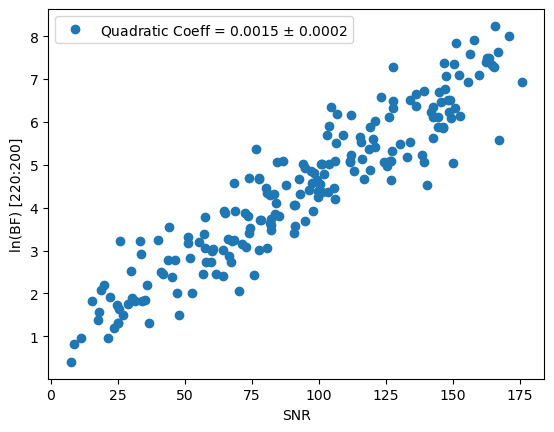

In [12]:
#also agrees with earlier no flow
data = np.loadtxt('./results/BF_scaling_allFixed_noFlow_220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

Quadratic coefficient = 0.00216 +- 0.00024


/tmp/ipykernel_224103/1613378593.py:10: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.5f $\pm$ %.5f' % (coeff[0], np.sqrt(err[0,0])))


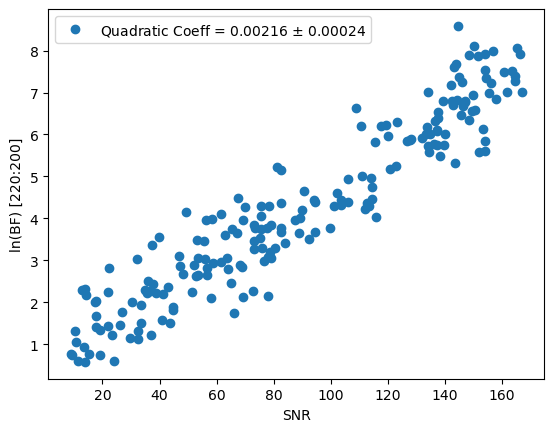

In [13]:
#Mislabeled, actually another no flow and agrees as well
data = np.loadtxt('./results/BF_scaling_allFixed_noFlow_noRemoveMean220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.5f $\pm$ %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

Quadratic coefficient = 0.00118 +- 0.00018


/tmp/ipykernel_224103/3375716621.py:10: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))


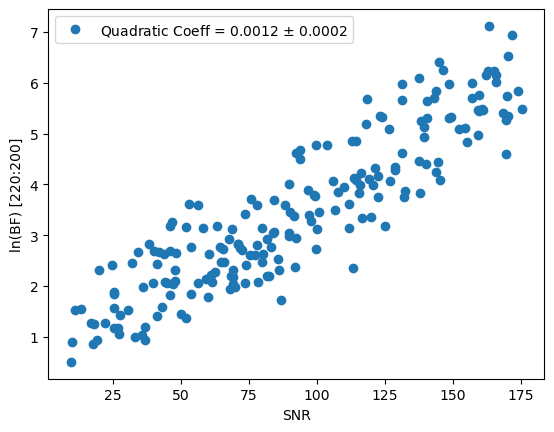

In [14]:
# Adding flow modifies the results
data = np.loadtxt('./results/BF_scaling_allFixed_flow=20_noRemoveMean220:200_ALL_incorrect.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

Quadratic coefficient = 0.00107 +- 0.00016


/tmp/ipykernel_224103/1589186307.py:10: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))


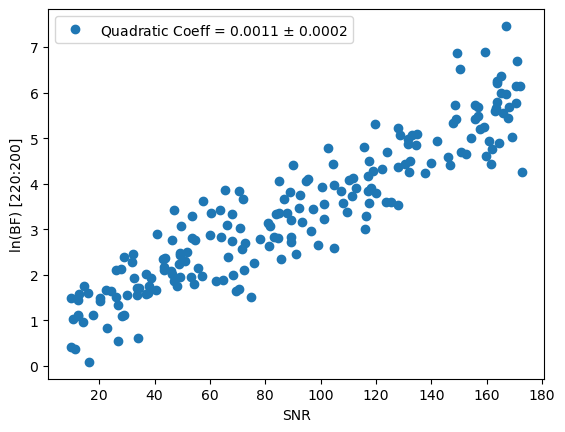

In [15]:
# Remove mean doesn't affect the flow=20 results
data = np.loadtxt('./results/BF_scaling_flow=20_removeMean=False220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

## All random

In [16]:
data = np.loadtxt('./results/BF_scaling_allRandom220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.02604 +- 0.00492


In [17]:
idx = log_BF>0
np.polyfit(SNRtot_MF[idx], np.sqrt(log_BF)[idx], deg=1)

/tmp/ipykernel_224103/2170950228.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.polyfit(SNRtot_MF[idx], np.sqrt(log_BF)[idx], deg=1)


array([ 0.06274851, -0.92956243])

/tmp/ipykernel_224103/1421234103.py:2: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o',  label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))


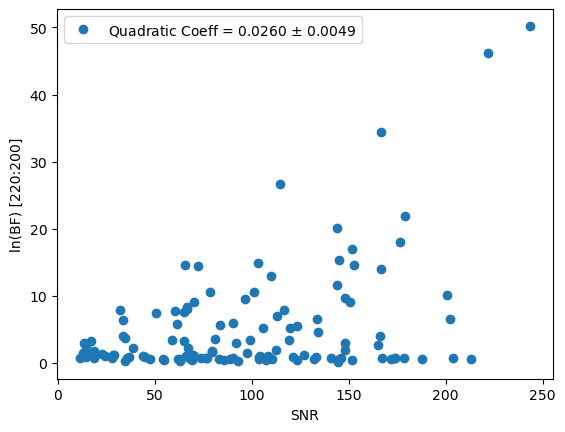

In [18]:
log_BF = evidence_inj - evidence_filt
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o',  label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend(loc="upper left")

## Plotting

/tmp/ipykernel_224103/3430874982.py:9: RuntimeWarning: invalid value encountered in sqrt
  coeff0, err0 = np.polyfit(SNRtot_MF[log_BF>0], np.sqrt(log_BF)[log_BF>0], deg=1, cov=True)
/tmp/ipykernel_224103/3430874982.py:11: RuntimeWarning: invalid value encountered in sqrt
  axs[0].plot(SNRtot_MF, np.sqrt(log_BF), 'o',
/tmp/ipykernel_224103/3430874982.py:27: RuntimeWarning: invalid value encountered in sqrt
  axs[1].plot(SNRtot_MF, np.sqrt(log_BF), 'o')


Text(0, 0.5, '$\\sqrt{\\mathrm{ln(BF)}}$ [220:200]')

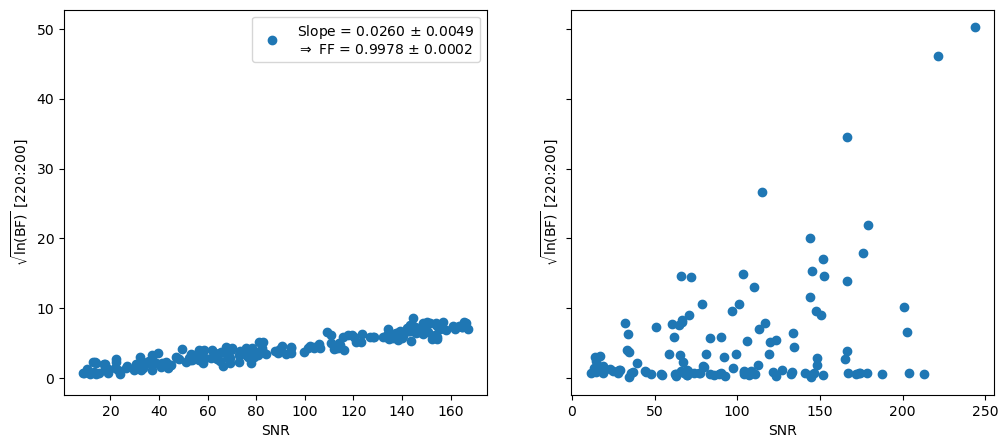

In [19]:
fig, axs = pl.subplots(1, 2, figsize = [12, 5], sharey = True)

data = np.loadtxt('./results/BF_scaling_allFixed_noFlow_noRemoveMean220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff0, err0 = np.polyfit(SNRtot_MF[log_BF>0], np.sqrt(log_BF)[log_BF>0], deg=1, cov=True)
coeff1, err1 = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
axs[0].plot(SNRtot_MF, np.sqrt(log_BF), 'o', 
            label=r'Slope = %.4f $\pm$ %.4f' "\n" r'$\Rightarrow$ FF = %.4f $\pm$ %.4f' \
            % (coeff[0], np.sqrt(err[0,0]), np.sqrt(1-2*coeff1[0]), abs(np.sqrt(1-2*(coeff1[0]+np.sqrt(err1[0,0]))) - np.sqrt(1-2*coeff1[0]))))
axs[0].set_xlabel("SNR")
axs[0].set_ylabel(r"$\sqrt{\mathrm{ln(BF)}}$ [220:200]")
axs[0].legend()

data = np.loadtxt('./results/BF_scaling_allRandom220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
# print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
log_BF = evidence_inj - evidence_filt
axs[1].plot(SNRtot_MF, np.sqrt(log_BF), 'o')
axs[1].set_xlabel("SNR")
axs[1].set_ylabel(r"$\sqrt{\mathrm{ln(BF)}}$ [220:200]")